In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="2"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
NpzDirectory = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2OYoloneatV0/'
TrainModelName = 'S54bin2.npz'
ValidationModelName = 'S54bin2Val.npz'


ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'ORnetbin2d38V0.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

#Neural network parameters





In [3]:
#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 32
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 38
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-4
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yoloV0 = True
ImageX = 54
ImageY = 54
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 5

In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = 1, gridY = 1, ImageX = ImageX, ImageY = ImageY, nboxes = nboxes, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=54, ImageY=54, ModelName='ORnetbin2d38V0.h5', batch_size=100, box_vector=4, categories=4, depth=38, epochs=250, gridX=1, gridY=1, learning_rate=0.0001, mid_kernel=3, multievent=False, nboxes=5, residual=True, start_kernel=3, startfilter=32)


number of  images:	 36076
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
number of  images:	 1899
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
loading weights
(36076, 1, 1, 24) 5














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 36076 samples, validate on 1899 samples
Epoch 1/250
36076/36076 [==============================] - 71s 2ms/step - loss: 1.5394 - acc: 0.9986 - val_loss: 1.6752 - val_acc: 0.9789

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.6751828929384864, 'val_acc': 0.9789362929255289, 'loss': 1.5393527868991814, 'acc': 0.9986140383546878, 'lr': 1e-04}


<Figure size 432x288 with 0 Axes>

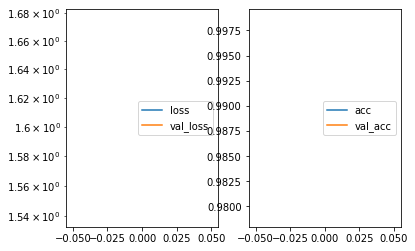

Predicted cell: MatureP1 Probability: [[0.9991322]]
True Cell type: MatureP1
X [[0.55558103]]
True positional value X 0.6851851851851852
Y [[0.4302109]]
True positional value Y 0.5
H [[0.34881067]]
True positional value H 0.3888888888888889
W [[0.23401701]]
True positional value W 0.2777777777777778


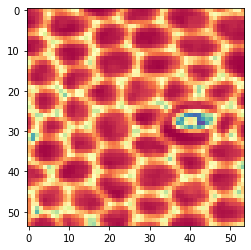

Epoch 2/250
36076/36076 [==============================] - 60s 2ms/step - loss: 1.5370 - acc: 0.9987 - val_loss: 1.6770 - val_acc: 0.9784

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.6769920295009242, 'val_acc': 0.9784097004840724, 'loss': 1.536955020712939, 'acc': 0.9986971960534065, 'lr': 1e-04}


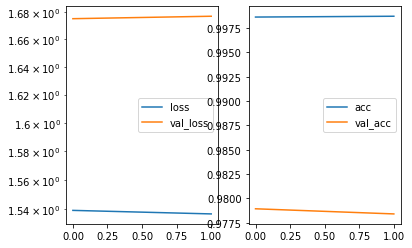

Predicted cell: NonMatureP1 Probability: [[0.97810537]]
True Cell type: NonMatureP1
X [[0.44252604]]
True positional value X 0.6851851851851852
Y [[0.32123554]]
True positional value Y 0.3148148148148148
H [[0.28699848]]
True positional value H 0.3333333333333333
W [[0.30055085]]
True positional value W 0.2777777777777778


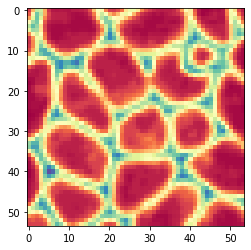

Epoch 3/250
36076/36076 [==============================] - 60s 2ms/step - loss: 1.5342 - acc: 0.9989 - val_loss: 1.6732 - val_acc: 0.9795

Epoch 00003: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.673194293476143, 'val_acc': 0.9794628864341564, 'loss': 1.5342069611685254, 'acc': 0.9989189499166564, 'lr': 1e-04}


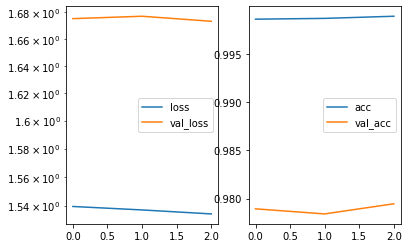

Predicted cell: Normal Probability: [[0.9999906]]
True Cell type: Normal
X [[0.35855806]]
True positional value X 0.5
Y [[0.3926999]]
True positional value Y 0.5
H [[0.41706976]]
True positional value H 0.46296296296296297
W [[0.47233027]]
True positional value W 0.5555555555555556


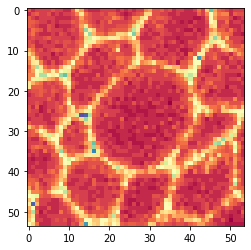

Epoch 4/250
36076/36076 [==============================] - 60s 2ms/step - loss: 1.5315 - acc: 0.9988 - val_loss: 1.6665 - val_acc: 0.9816

Epoch 00004: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.6665070039338348, 'val_acc': 0.9815692582715493, 'loss': 1.5315374007892788, 'acc': 0.9988080729850315, 'lr': 1e-04}


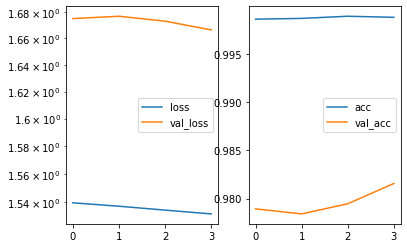

Predicted cell: Normal Probability: [[0.9913728]]
True Cell type: Normal
X [[0.34819165]]
True positional value X 0.5
Y [[0.40191108]]
True positional value Y 0.5
H [[0.3456899]]
True positional value H 0.3148148148148148
W [[0.3591774]]
True positional value W 0.3333333333333333


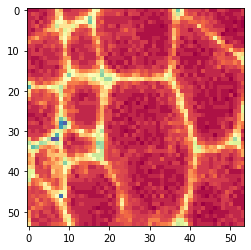

Epoch 5/250
36076/36076 [==============================] - 60s 2ms/step - loss: 1.5290 - acc: 0.9990 - val_loss: 1.6653 - val_acc: 0.9816

Epoch 00005: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.6653343205580027, 'val_acc': 0.9815692593387204, 'loss': 1.5289764668516157, 'acc': 0.998974388382469, 'lr': 1e-04}


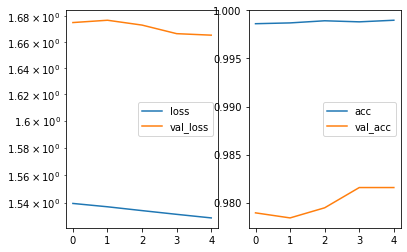

Predicted cell: MatureP1 Probability: [[0.99824035]]
True Cell type: MatureP1
X [[0.36952287]]
True positional value X 0.5
Y [[0.42786628]]
True positional value Y 0.5
H [[0.2681297]]
True positional value H 0.25925925925925924
W [[0.2902626]]
True positional value W 0.3148148148148148


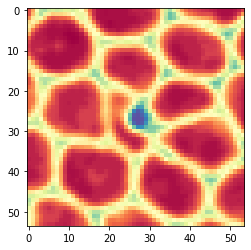

Epoch 6/250
36076/36076 [==============================] - 61s 2ms/step - loss: 1.5267 - acc: 0.9988 - val_loss: 1.6726 - val_acc: 0.9758

Epoch 00006: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.672602699768424, 'val_acc': 0.9757767362052231, 'loss': 1.5266701935109257, 'acc': 0.9988357922179377, 'lr': 1e-04}


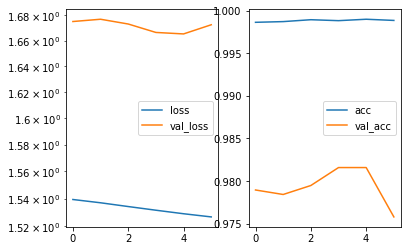

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.3037767]]
True positional value X 0.3148148148148148
Y [[0.3291207]]
True positional value Y 0.3148148148148148
H [[0.6649144]]
True positional value H 0.8148148148148148
W [[0.64284325]]
True positional value W 0.8888888888888888


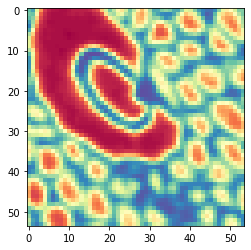

Epoch 7/250
36076/36076 [==============================] - 61s 2ms/step - loss: 1.5248 - acc: 0.9989 - val_loss: 1.6687 - val_acc: 0.9784

Epoch 00007: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.668742693870428, 'val_acc': 0.978409698412505, 'loss': 1.5247968041800333, 'acc': 0.9988912306837502, 'lr': 1e-04}


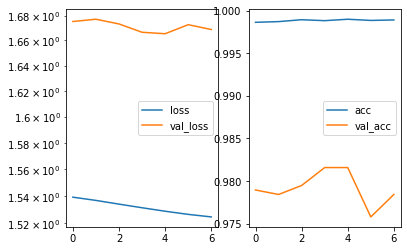

Predicted cell: MacroCheate Probability: [[0.9999908]]
True Cell type: MacroCheate
X [[0.26055086]]
True positional value X 0.3148148148148148
Y [[0.39918572]]
True positional value Y 0.5
H [[0.6368355]]
True positional value H 0.7962962962962963
W [[0.5204905]]
True positional value W 0.6111111111111112


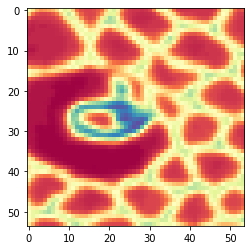

Epoch 8/250
36076/36076 [==============================] - 61s 2ms/step - loss: 1.5222 - acc: 0.9988 - val_loss: 1.6690 - val_acc: 0.9779

Epoch 00008: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.6690435295923562, 'val_acc': 0.9778831111813546, 'loss': 1.5221546969507338, 'acc': 0.9988357922179377, 'lr': 1e-04}


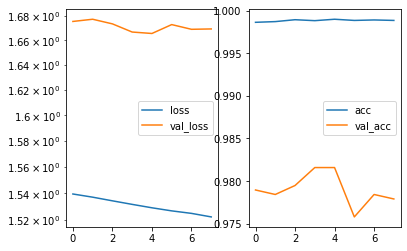

Predicted cell: Normal Probability: [[0.9999958]]
True Cell type: Normal
X [[0.43645987]]
True positional value X 0.5
Y [[0.31802982]]
True positional value Y 0.5
H [[0.26223677]]
True positional value H 0.16666666666666666
W [[0.25229925]]
True positional value W 0.2222222222222222


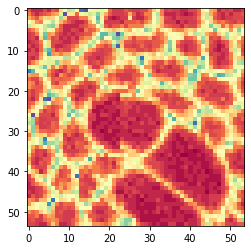

Epoch 9/250
36076/36076 [==============================] - 61s 2ms/step - loss: 1.5200 - acc: 0.9989 - val_loss: 1.6566 - val_acc: 0.9800

Epoch 00009: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.6566286687790688, 'val_acc': 0.9799894788756127, 'loss': 1.5199667561647698, 'acc': 0.9988912306837502, 'lr': 1e-04}


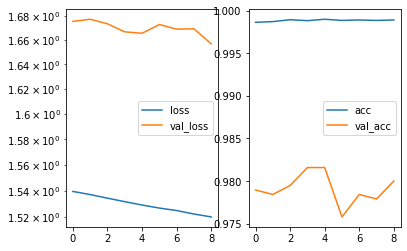

Predicted cell: MatureP1 Probability: [[0.999551]]
True Cell type: MatureP1
X [[0.24998708]]
True positional value X 0.3148148148148148
Y [[0.55119]]
True positional value Y 0.6851851851851852
H [[0.22201093]]
True positional value H 0.3148148148148148
W [[0.24630204]]
True positional value W 0.25925925925925924


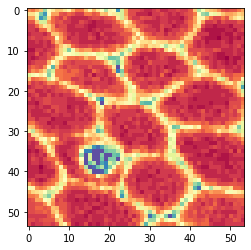

Epoch 10/250
36076/36076 [==============================] - 61s 2ms/step - loss: 1.5167 - acc: 0.9991 - val_loss: 1.6537 - val_acc: 0.9805

Epoch 00010: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.6536821047841654, 'val_acc': 0.9805160681783306, 'loss': 1.5167273898414952, 'acc': 0.9990575460811877, 'lr': 1e-04}


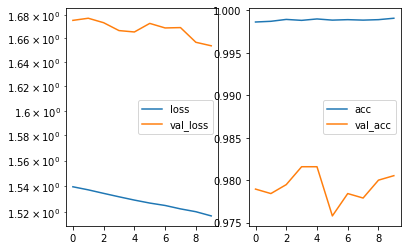

Predicted cell: MatureP1 Probability: [[0.99979776]]
True Cell type: MatureP1
X [[0.2624325]]
True positional value X 0.3148148148148148
Y [[0.25317132]]
True positional value Y 0.3148148148148148
H [[0.31632066]]
True positional value H 0.37037037037037035
W [[0.3146017]]
True positional value W 0.3148148148148148


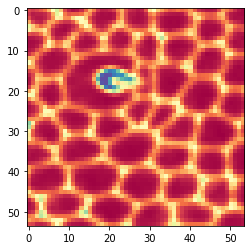

Epoch 11/250
36076/36076 [==============================] - 60s 2ms/step - loss: 1.5156 - acc: 0.9987 - val_loss: 1.6578 - val_acc: 0.9763

Epoch 00011: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.6578368649726294, 'val_acc': 0.9763033255079409, 'loss': 1.515562150176738, 'acc': 0.9987249152863128, 'lr': 1e-04}


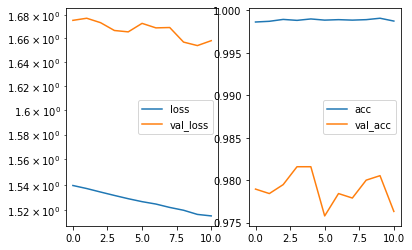

Predicted cell: NonMatureP1 Probability: [[0.99725854]]
True Cell type: NonMatureP1
X [[0.29288632]]
True positional value X 0.3148148148148148
Y [[0.33660632]]
True positional value Y 0.5
H [[0.3190093]]
True positional value H 0.3333333333333333
W [[0.24126819]]
True positional value W 0.2962962962962963


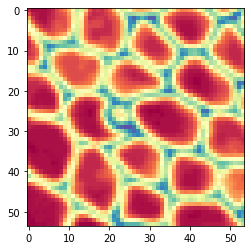

Epoch 12/250
36076/36076 [==============================] - 61s 2ms/step - loss: 1.5120 - acc: 0.9991 - val_loss: 1.6483 - val_acc: 0.9821

Epoch 00012: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.6482546583736113, 'val_acc': 0.9820958538517442, 'loss': 1.512045233751139, 'acc': 0.9991129845470001, 'lr': 1e-04}


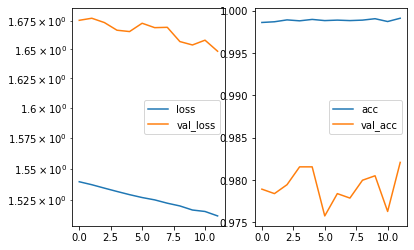

Predicted cell: Normal Probability: [[0.99999964]]
True Cell type: Normal
X [[0.40487844]]
True positional value X 0.5
Y [[0.37038714]]
True positional value Y 0.5
H [[0.17575513]]
True positional value H 0.24074074074074073
W [[0.29427868]]
True positional value W 0.3888888888888889


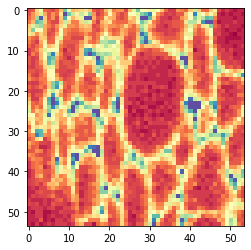

Epoch 13/250
36076/36076 [==============================] - 61s 2ms/step - loss: 1.5105 - acc: 0.9989 - val_loss: 1.6461 - val_acc: 0.9816

Epoch 00013: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.6460934917571484, 'val_acc': 0.9815692582715493, 'loss': 1.5105391869273759, 'acc': 0.9988912306837502, 'lr': 1e-04}


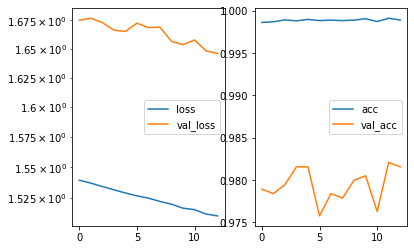

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.37681258]]
True positional value X 0.5
Y [[0.308688]]
True positional value Y 0.3148148148148148
H [[0.45515355]]
True positional value H 0.5740740740740741
W [[0.5029482]]
True positional value W 0.5925925925925926


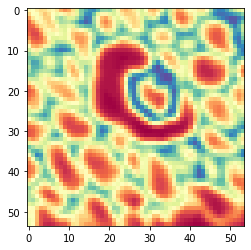

Epoch 14/250
36076/36076 [==============================] - 61s 2ms/step - loss: 1.5081 - acc: 0.9991 - val_loss: 1.6467 - val_acc: 0.9816

Epoch 00014: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.6467446981448133, 'val_acc': 0.9815692561999819, 'loss': 1.5080789966823283, 'acc': 0.9991407037799064, 'lr': 1e-04}


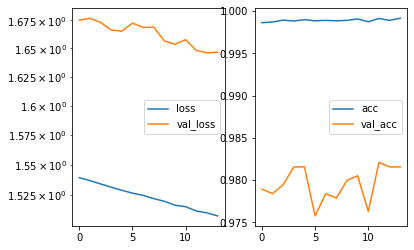

Predicted cell: MacroCheate Probability: [[0.99999833]]
True Cell type: MacroCheate
X [[0.3092169]]
True positional value X 0.3148148148148148
Y [[0.4016747]]
True positional value Y 0.5
H [[0.6500826]]
True positional value H 0.8333333333333334
W [[0.62569004]]
True positional value W 0.5


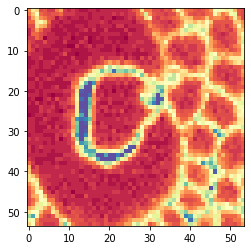

Epoch 15/250
36076/36076 [==============================] - 60s 2ms/step - loss: 1.5059 - acc: 0.9990 - val_loss: 1.6449 - val_acc: 0.9816

Epoch 00015: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.6449056155057629, 'val_acc': 0.9815692593387204, 'loss': 1.5058895791233848, 'acc': 0.9990298268482815, 'lr': 1e-04}


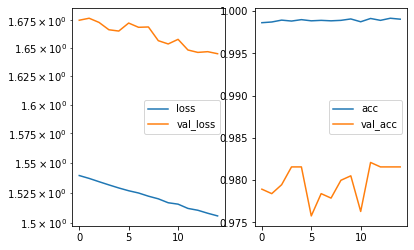

Predicted cell: MacroCheate Probability: [[0.9999995]]
True Cell type: MacroCheate
X [[0.32410976]]
True positional value X 0.5
Y [[0.31410143]]
True positional value Y 0.3148148148148148
H [[0.31060025]]
True positional value H 0.42592592592592593
W [[0.4137446]]
True positional value W 0.5


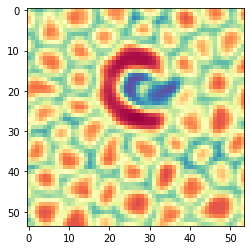

Epoch 16/250
36076/36076 [==============================] - 61s 2ms/step - loss: 1.5040 - acc: 0.9989 - val_loss: 1.6585 - val_acc: 0.9768

Epoch 00016: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.6584522556542973, 'val_acc': 0.9768299231597033, 'loss': 1.5039725923686245, 'acc': 0.998918949870395, 'lr': 1e-04}


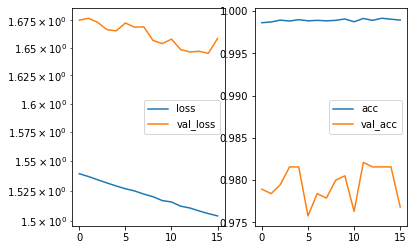

Predicted cell: Normal Probability: [[0.9998797]]
True Cell type: Normal
X [[0.40729147]]
True positional value X 0.5
Y [[0.5070384]]
True positional value Y 0.5
H [[0.41617814]]
True positional value H 0.6111111111111112
W [[0.39617914]]
True positional value W 0.48148148148148145


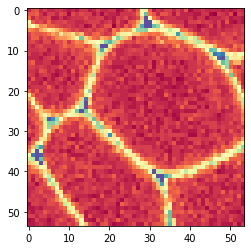

Epoch 17/250
36076/36076 [==============================] - 61s 2ms/step - loss: 1.5014 - acc: 0.9989 - val_loss: 1.6488 - val_acc: 0.9753

Epoch 00017: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.6488402338640635, 'val_acc': 0.9752501437637666, 'loss': 1.5013647944822268, 'acc': 0.9988912306837502, 'lr': 1e-04}


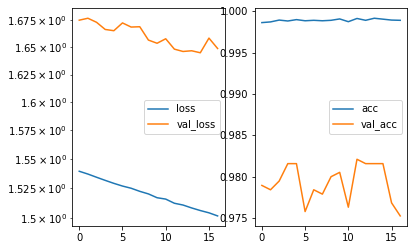

Predicted cell: MacroCheate Probability: [[0.9999999]]
True Cell type: MacroCheate
X [[0.2778861]]
True positional value X 0.3148148148148148
Y [[0.36727378]]
True positional value Y 0.5
H [[0.3798256]]
True positional value H 0.18518518518518517
W [[0.54275465]]
True positional value W 0.18518518518518517


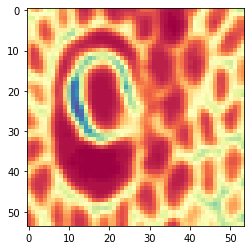

Epoch 18/250
36076/36076 [==============================] - 60s 2ms/step - loss: 1.4989 - acc: 0.9990 - val_loss: 1.6388 - val_acc: 0.9810

Epoch 00018: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.638766677835353, 'val_acc': 0.981042660619787, 'loss': 1.498883470673164, 'acc': 0.9990298268482815, 'lr': 1e-04}


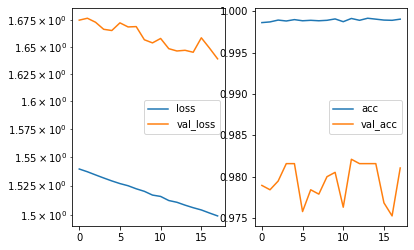

Predicted cell: MatureP1 Probability: [[0.99987495]]
True Cell type: MatureP1
X [[0.28424793]]
True positional value X 0.3148148148148148
Y [[0.46422786]]
True positional value Y 0.6851851851851852
H [[0.2992105]]
True positional value H 0.3888888888888889
W [[0.37663728]]
True positional value W 0.5


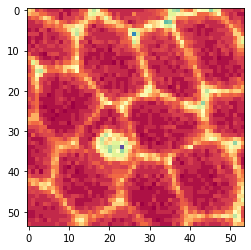

Epoch 19/250
36076/36076 [==============================] - 61s 2ms/step - loss: 1.4970 - acc: 0.9989 - val_loss: 1.6355 - val_acc: 0.9816

Epoch 00019: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.6354911259565308, 'val_acc': 0.9815692530612433, 'loss': 1.496996812855329, 'acc': 0.9988912306837502, 'lr': 1e-04}


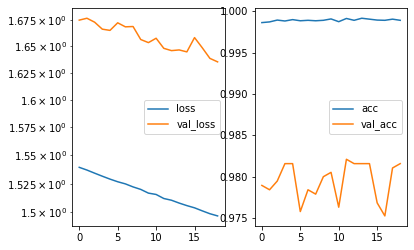

Predicted cell: MatureP1 Probability: [[0.9999795]]
True Cell type: MatureP1
X [[0.22991595]]
True positional value X 0.3148148148148148
Y [[0.5572311]]
True positional value Y 0.6851851851851852
H [[0.23089266]]
True positional value H 0.2222222222222222
W [[0.22474313]]
True positional value W 0.3148148148148148


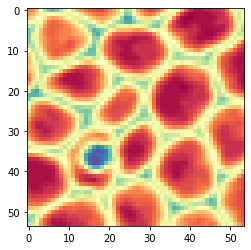

Epoch 20/250
36076/36076 [==============================] - 60s 2ms/step - loss: 1.4951 - acc: 0.9989 - val_loss: 1.6473 - val_acc: 0.9753

Epoch 00020: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d38V0.h5
{'val_loss': 1.6473437005309697, 'val_acc': 0.9752501458353341, 'loss': 1.4950753691482206, 'acc': 0.998863511450844, 'lr': 1e-04}


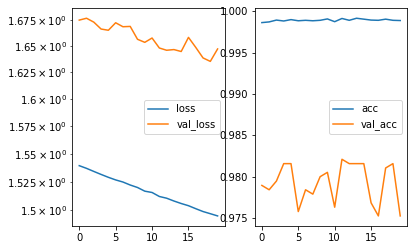

Predicted cell: MacroCheate Probability: [[1.]]
True Cell type: MacroCheate
X [[0.21962743]]
True positional value X 0.3148148148148148
Y [[0.20487802]]
True positional value Y 0.3148148148148148
H [[0.66139233]]
True positional value H 0.7777777777777778
W [[0.6606386]]
True positional value W 0.8148148148148148


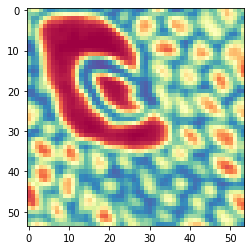

Epoch 21/250
 9800/36076 [=======>......................] - ETA: 43s - loss: 1.4937 - acc: 0.9992

KeyboardInterrupt: 

In [5]:
Train = NEATStaticDetection(config, NpzDirectory,KeyCategories, KeyCord,TrainModelName,ValidationModelName, ModelDir, Model_Name, show = show, yoloV0 = yoloV0)

Train.loadData()

Train.TrainModel()
